In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Read the data
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preprocessing
telco.dropna(inplace=True)
telco['SeniorCitizen'] = telco['SeniorCitizen'].apply(lambda x: 'YES' if x == 1 else 'NO')
telco['SeniorCitizen'] 

0        NO
1        NO
2        NO
3        NO
4        NO
       ... 
7038     NO
7039     NO
7040     NO
7041    YES
7042     NO
Name: SeniorCitizen, Length: 7043, dtype: object

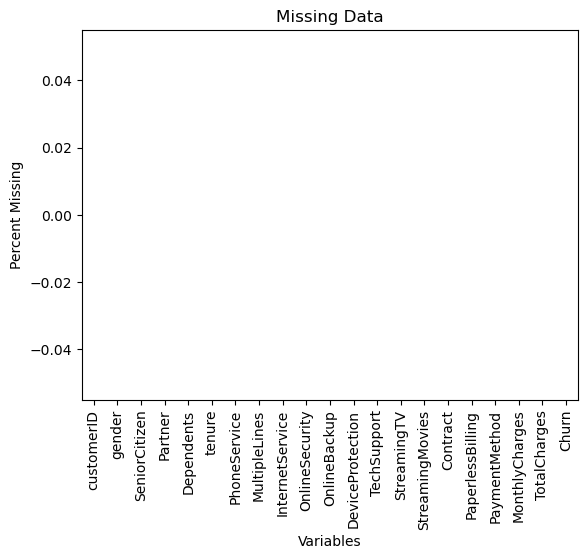

In [17]:
missing_data = telco.isnull().mean()
missing_data.plot(kind='bar', color='red')
plt.xlabel('Variables')
plt.ylabel('Percent Missing')
plt.xticks(rotation=90)
plt.title('Missing Data')
plt.show()

In [9]:
print(missing_data)
#The output shows that we don't have any missing values in the dataset

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [13]:
# Convert categorical variables to dummy variables
telco = pd.get_dummies(telco, drop_first=True) 
telco

,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,1,29.85,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,34,56.95,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,53.85,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,45,42.30,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,70.70,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,72,103.20,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,11,29.60,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,4,74.40,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [14]:
# Splitting the data
X = telco.drop('Churn_Yes', axis=1)
y = telco['Churn_Yes']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=123)
X_train, X_validation, y_train, y_validation

(      tenure  MonthlyCharges  customerID_0003-MKNFE  customerID_0004-TLHLJ  \
 1479      44           49.05                  False                  False   
 2377      47           55.30                  False                  False   
 6613       3           20.40                  False                  False   
 6468      14           44.60                  False                  False   
 2668       1           19.75                  False                  False   
 ...      ...             ...                    ...                    ...   
 5218       0           19.70                  False                  False   
 4060      54           63.35                  False                  False   
 1346      14           87.25                  False                  False   
 3454      29           35.65                  False                  False   
 3582       3           80.50                  False                  False   
 
       customerID_0011-IGKFF  customerID_0013-EXCH

In [6]:
# Data Overview
# Load the data
import pandas as pd

# Display basic information about the dataset
print("Number of observations:", telco.shape[0])
print("Number of attributes:", telco.shape[1])
print("\nData types of attributes:")
print(telco.dtypes)


Number of observations: 7043
Number of attributes: 21

Data types of attributes:
customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [7]:
#Summary Statistics
# Compute descriptive statistics
summary_stats = telco.describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000


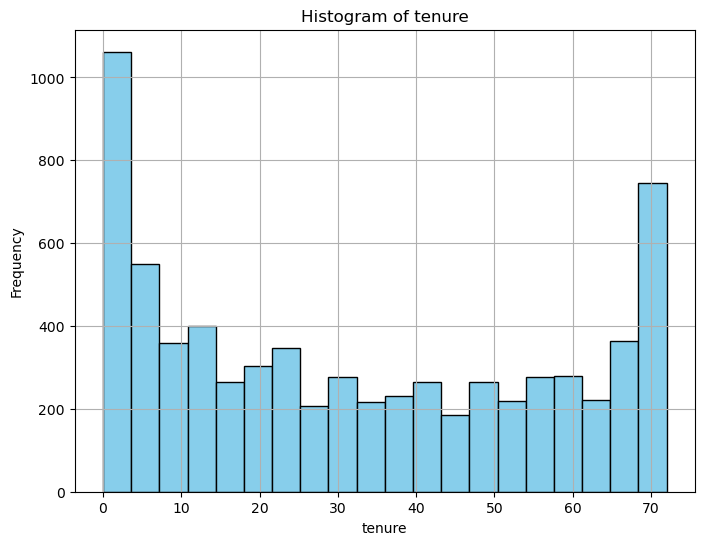

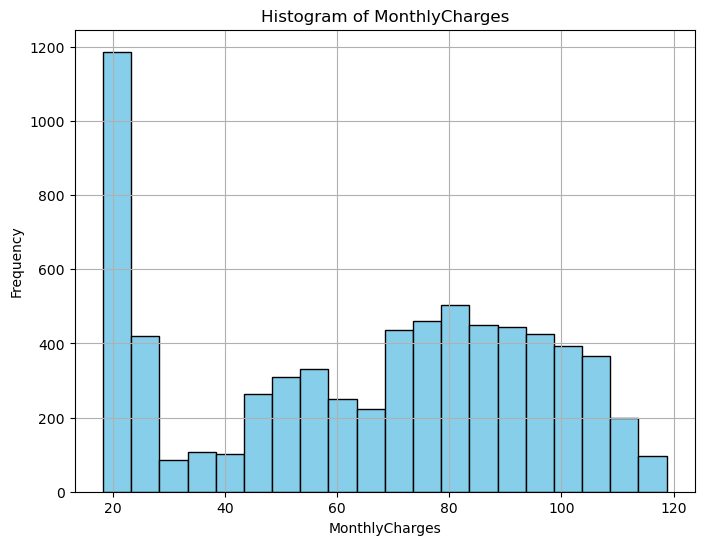

In [6]:
#Univariate Analysis
import matplotlib.pyplot as plt

# Visualize numerical attributes
numerical_attributes = telco.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_attributes:
    plt.figure(figsize=(8, 6))
    telco[col].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



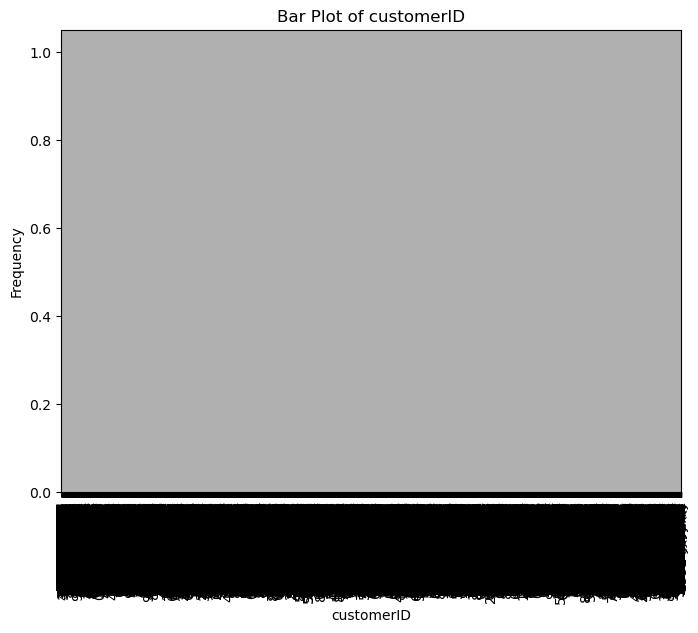

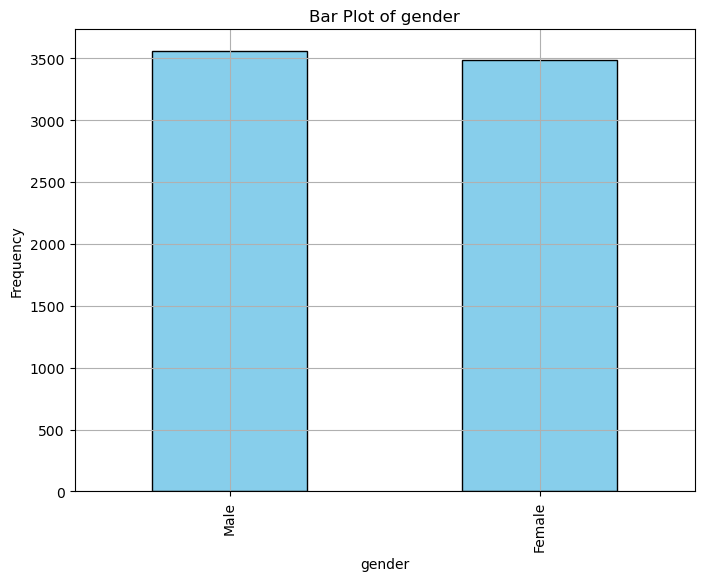

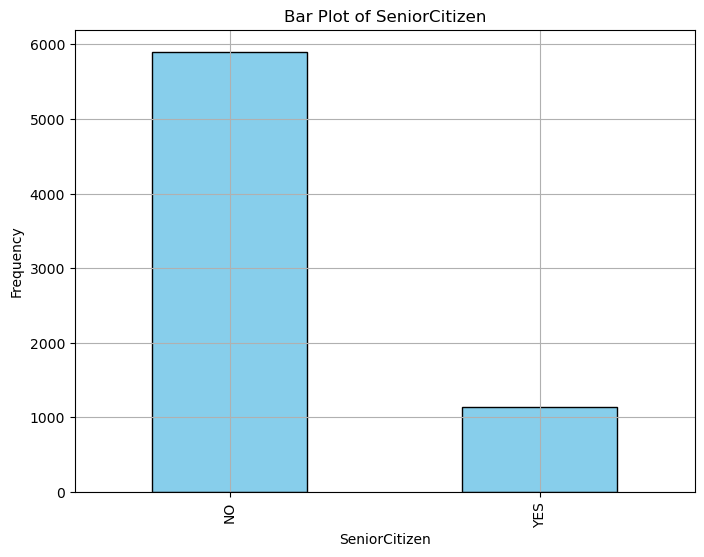

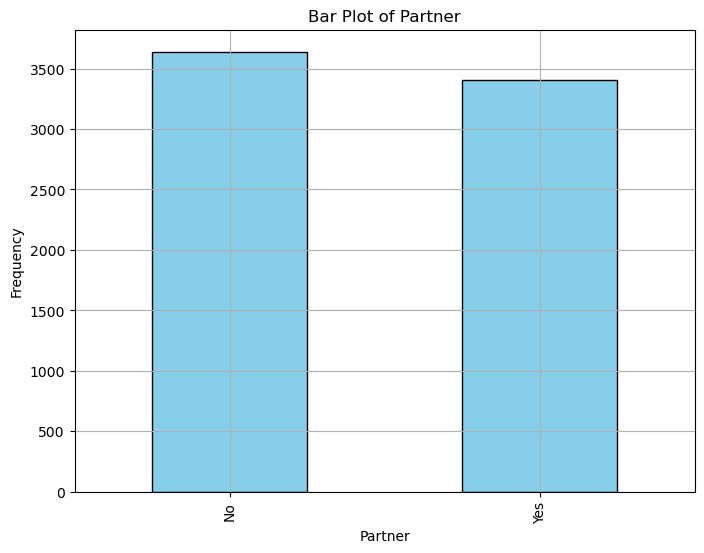

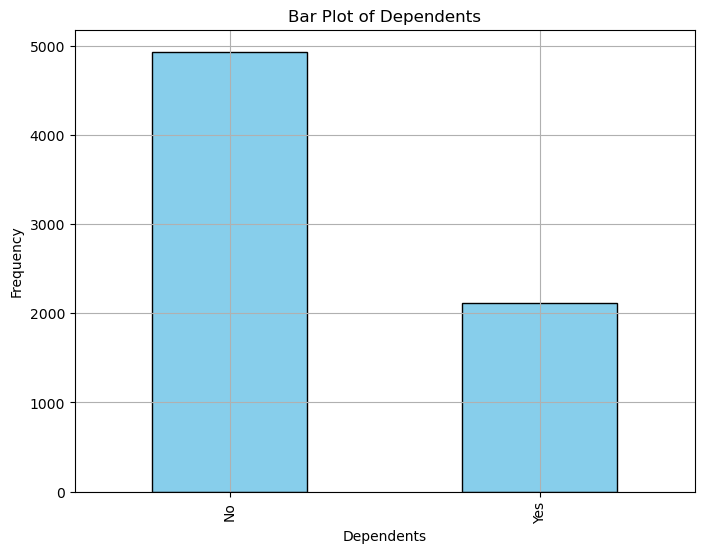

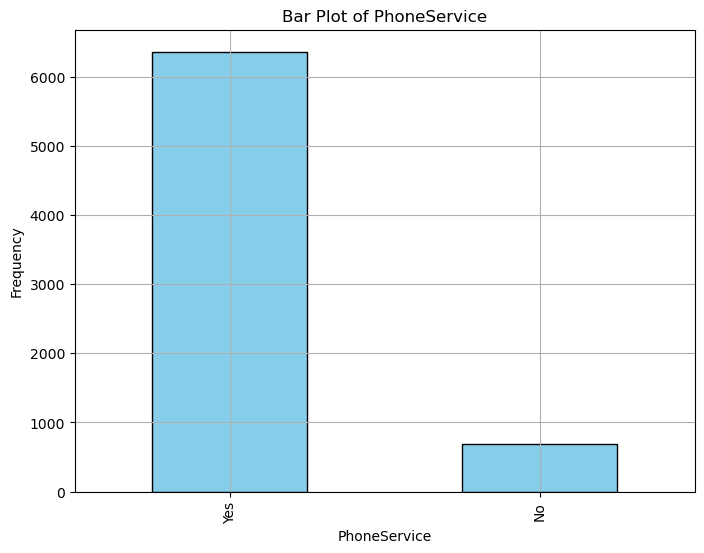

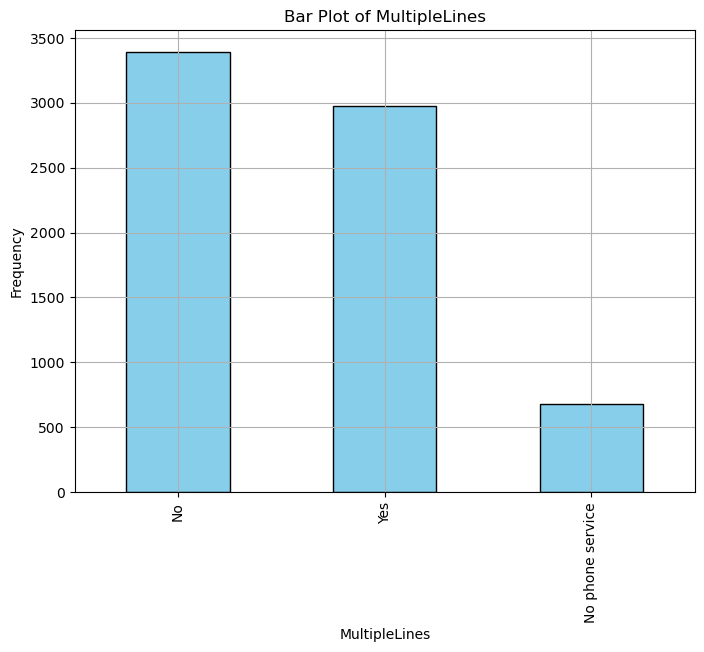

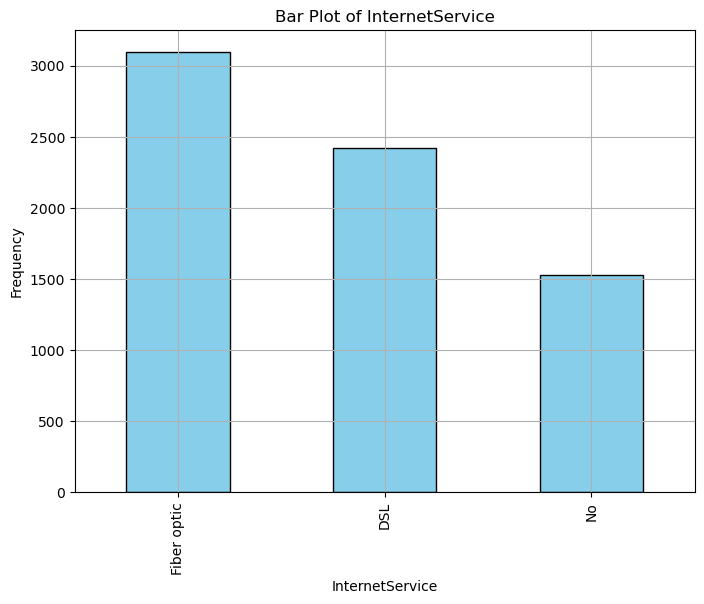

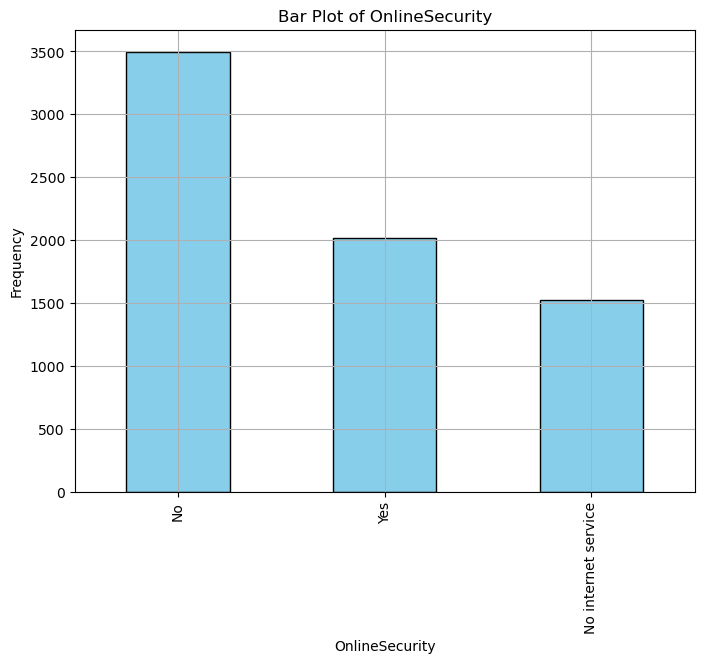

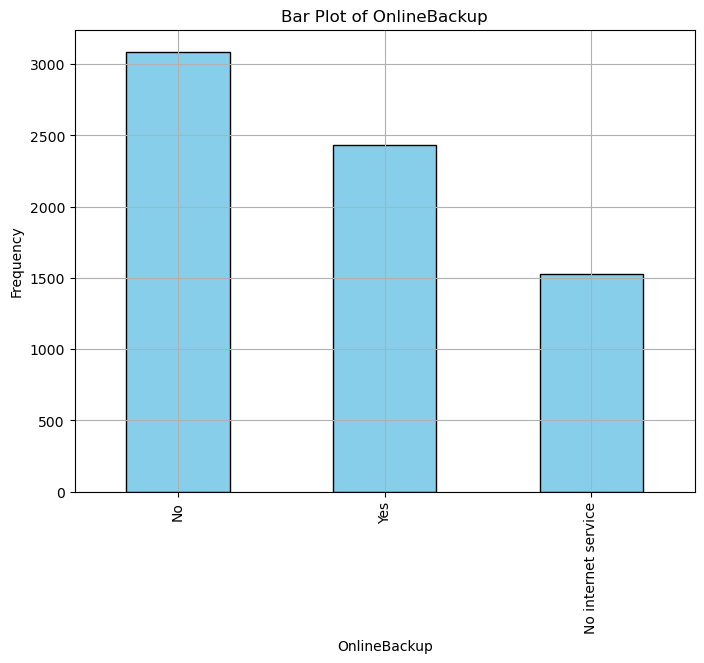

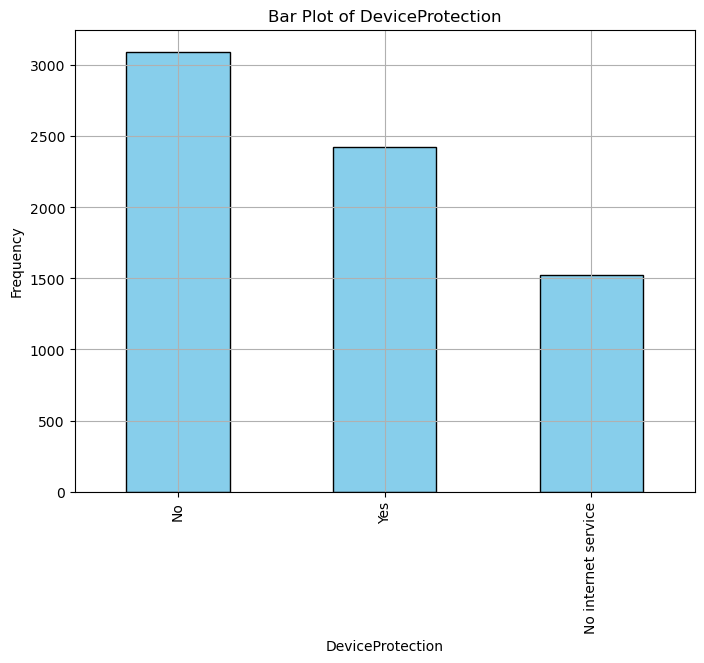

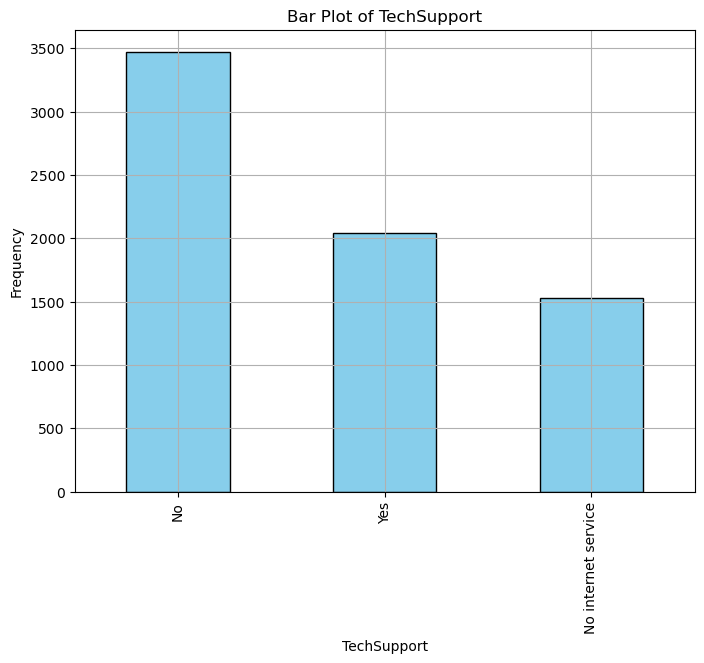

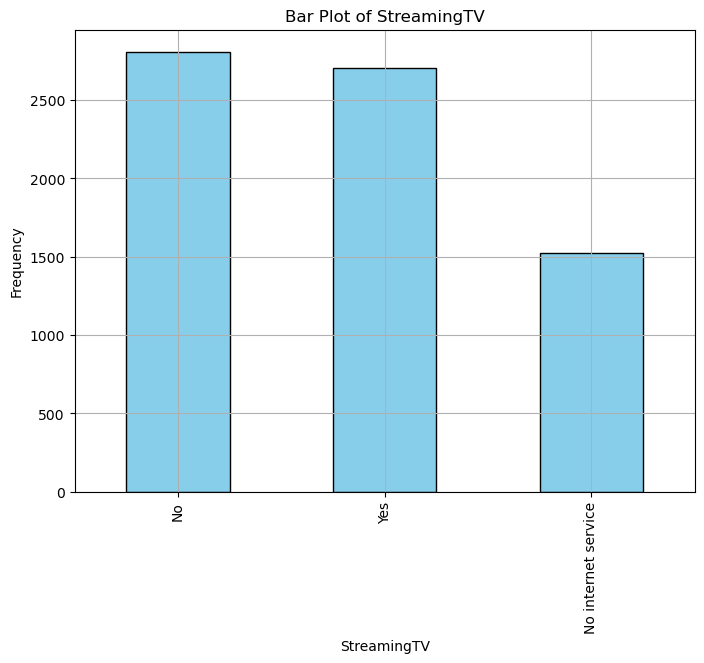

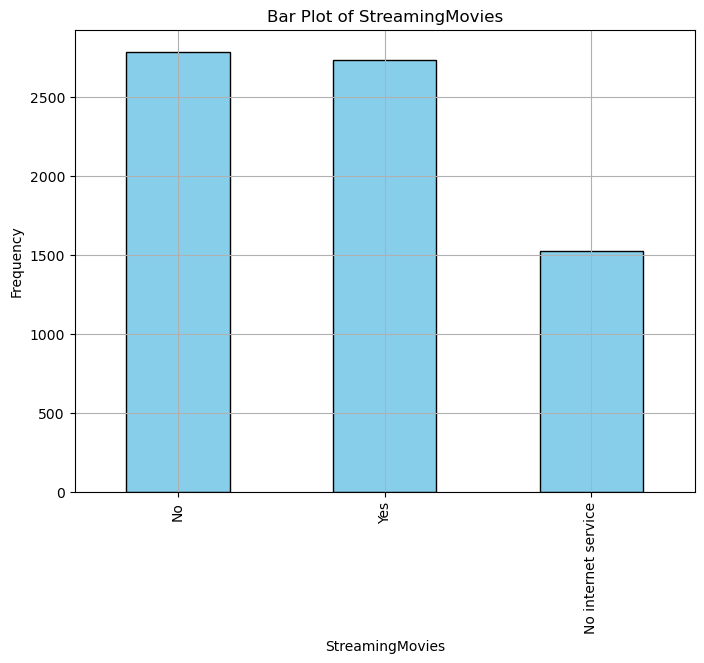

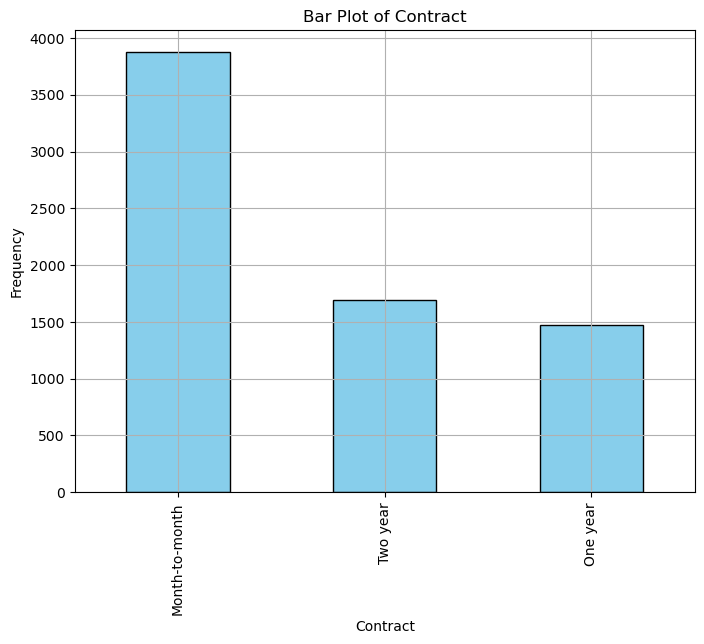

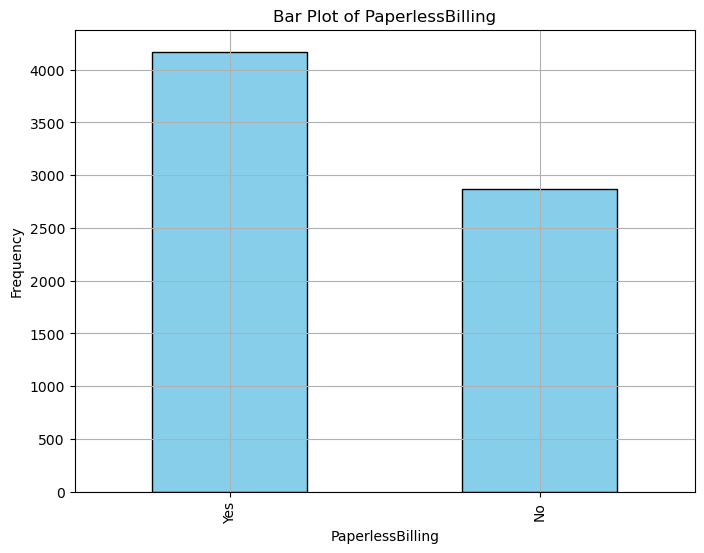

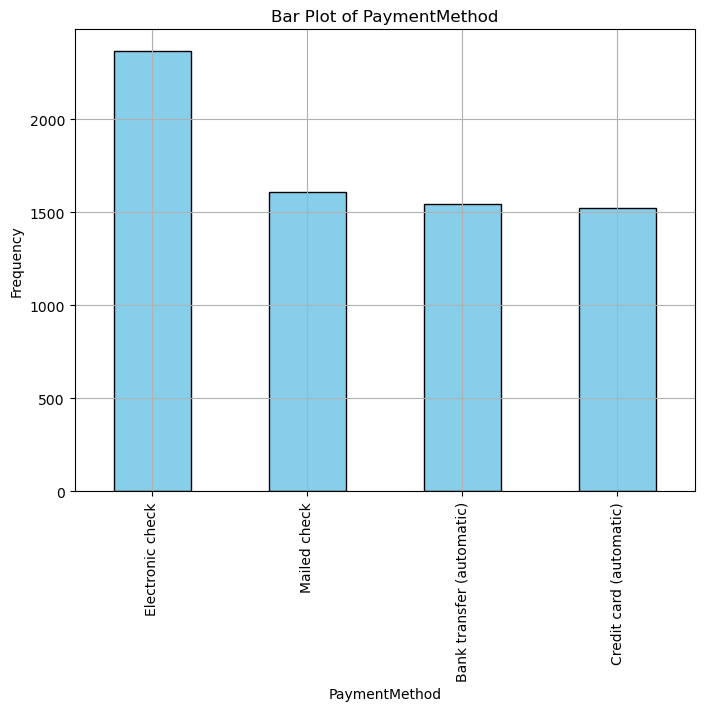

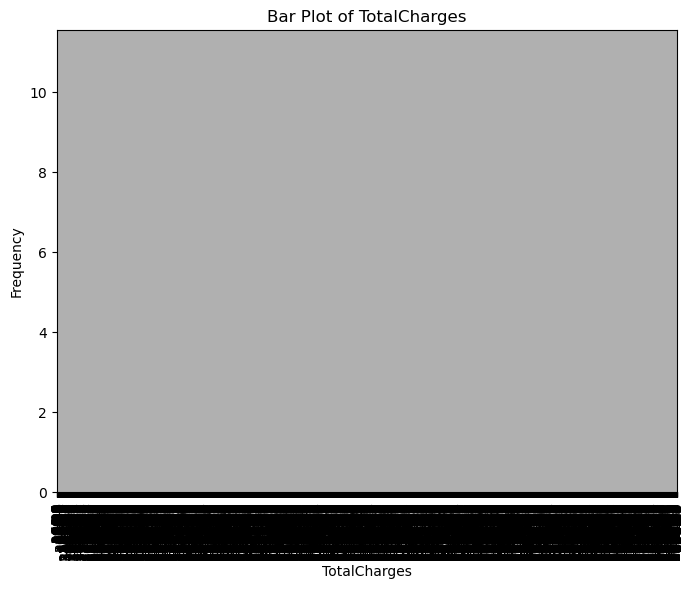

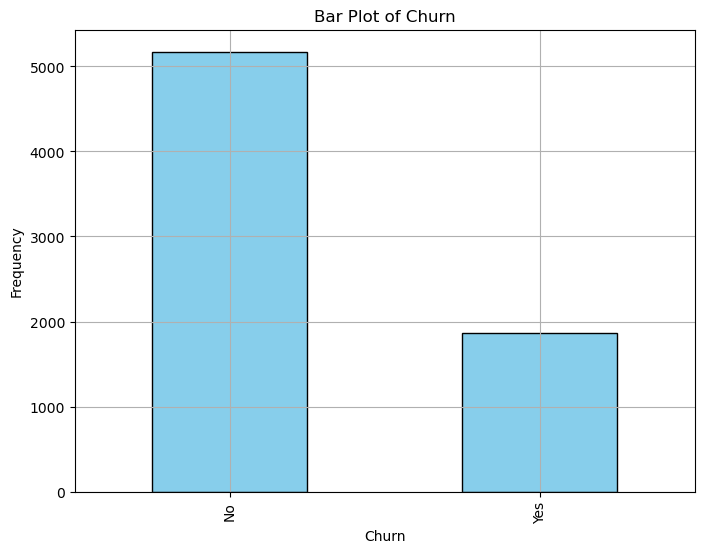

In [3]:
# Visualize categorical attributes
categorical_attributes = telco.select_dtypes(include=['object']).columns
for col in categorical_attributes:
    plt.figure(figsize=(8, 6))
    telco[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [8]:
print(numerical_attributes)
print(categorical_attributes)
# Calculate the number of numerical attributes
numerical_attributes = telco.select_dtypes(include=['int64', 'float64']).columns
num_numerical_attributes = len(numerical_attributes)

# Calculate the number of categorical attributes
categorical_attributes = telco.select_dtypes(include=['object']).columns
num_categorical_attributes = len(categorical_attributes)

print("Number of Numerical Attributes:", num_numerical_attributes)
print("Number of Categorical Attributes:", num_categorical_attributes)


Index(['tenure', 'MonthlyCharges'], dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges', 'Churn'],
      dtype='object')
Number of Numerical Attributes: 2
Number of Categorical Attributes: 19


C:\Users\palak\AppData\Local\Temp\ipykernel_4304\258749476.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)
C:\Users\palak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\palak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


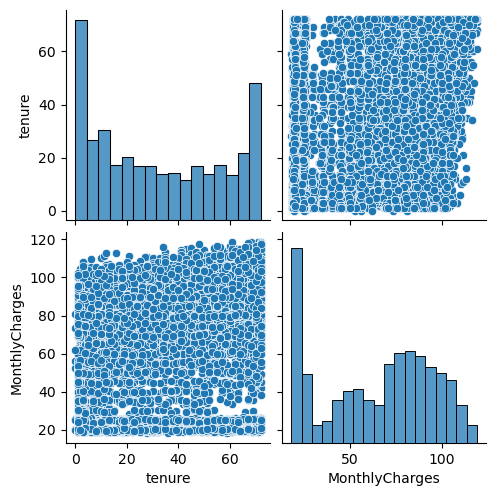

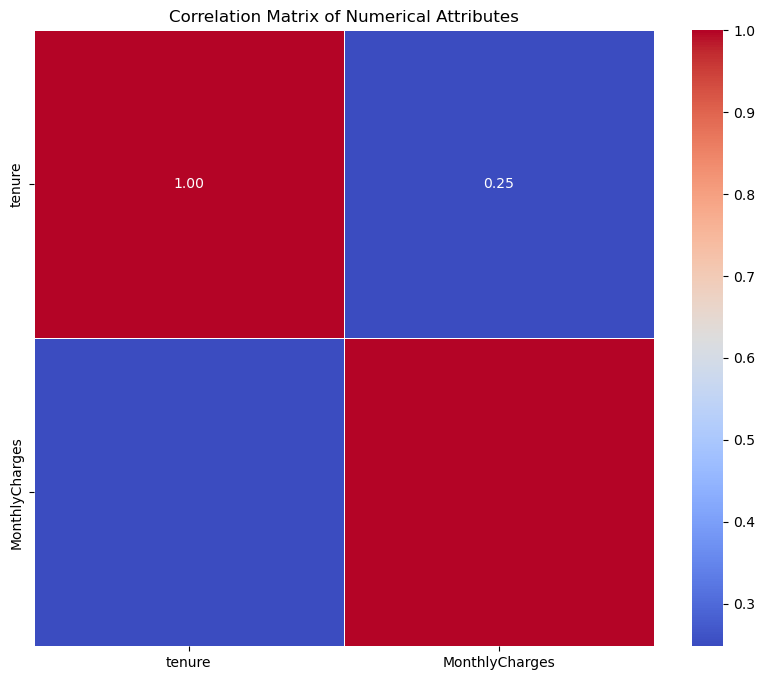

In [11]:
#Bivariate Analysis
import seaborn as sns
import pandas as pd

# Set use_inf_as_na to True explicitly
pd.set_option('mode.use_inf_as_na', True)

# Explore relationships between pairs of attributes using pair plots
sns.pairplot(telco[numerical_attributes])
plt.show()

# Investigate correlations between numerical variables using a correlation matrix
correlation_matrix = telco[numerical_attributes].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

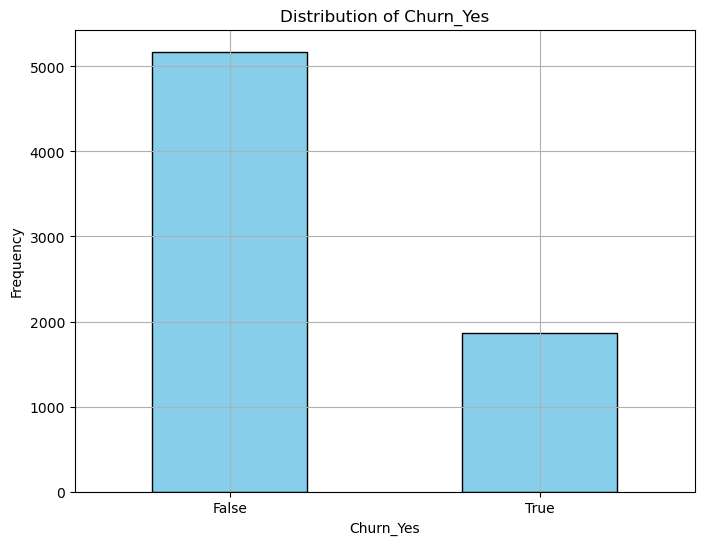

In [15]:
#Target Variable Ananlysis
# Examine the distribution of the target variable (Churn_Yes)
plt.figure(figsize=(8, 6))
telco['Churn_Yes'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Churn_Yes')
plt.xlabel('Churn_Yes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


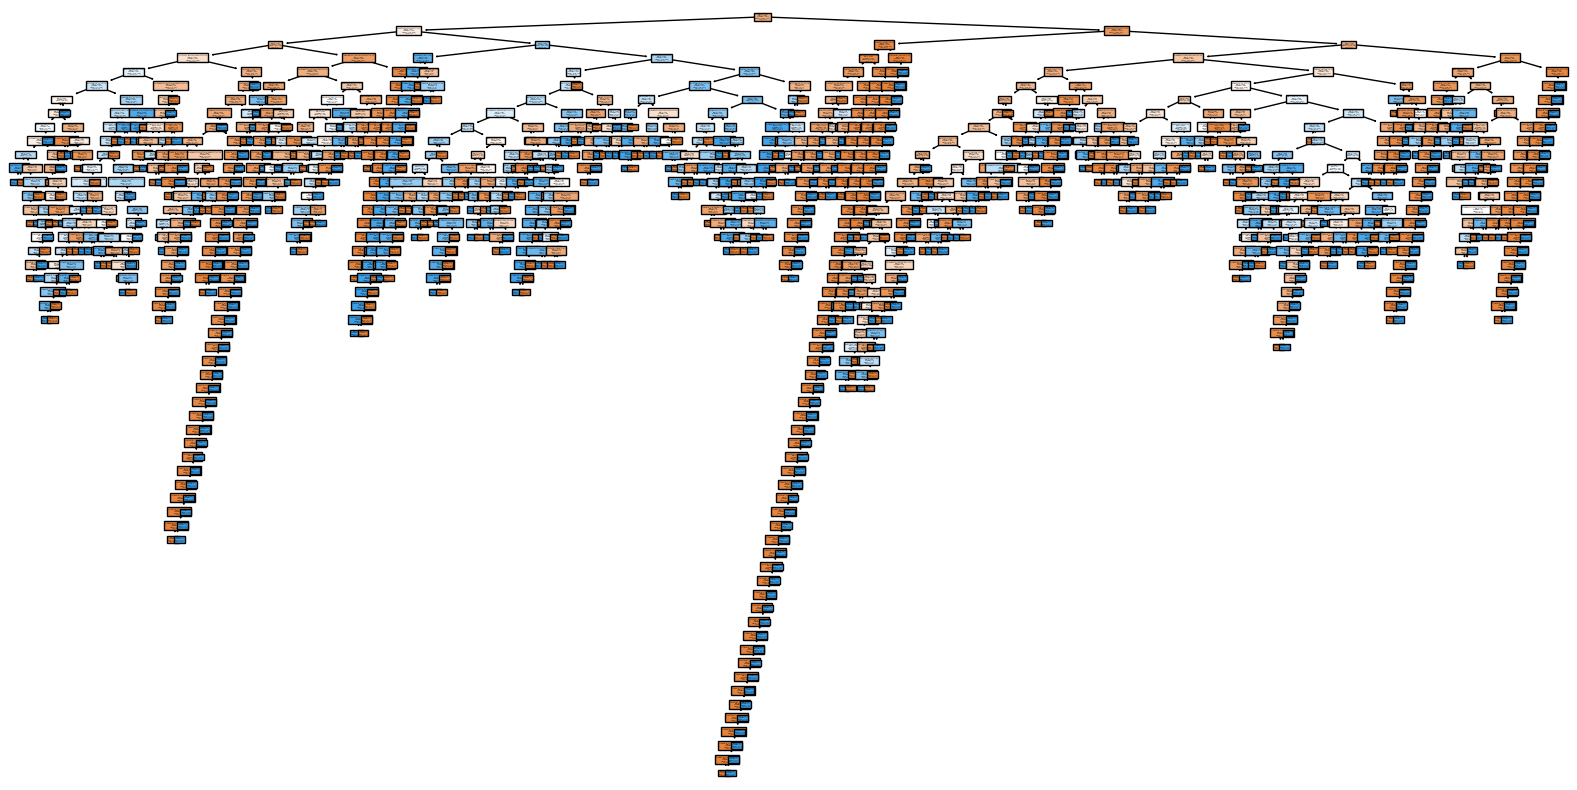

In [10]:
# Building the decision tree model
from sklearn.tree import plot_tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_validation)
tree_conf_matrix = confusion_matrix(y_validation, tree_pred)
tree_accuracy = accuracy_score(y_validation, tree_pred)
tree_pred_proba = tree_model.predict_proba(X_validation)[:, 1]
tree_roc_auc = roc_auc_score(y_validation, tree_pred_proba)

# Building the decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


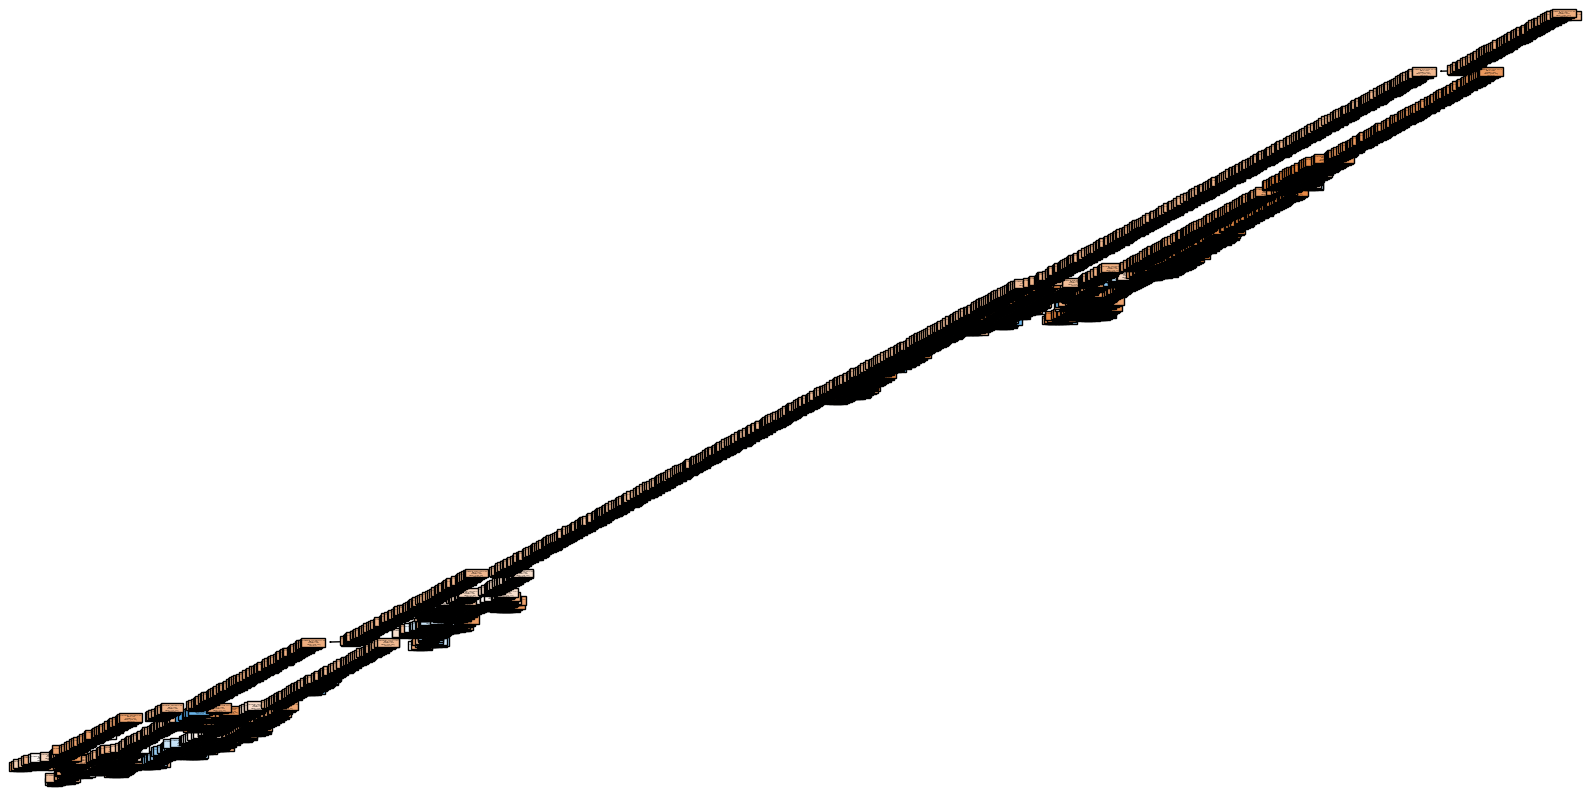

In [12]:
# Building the random forest model
rf_model = RandomForestClassifier(n_estimators=500, max_features=4, random_state=123)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_validation)
rf_conf_matrix = confusion_matrix(y_validation, rf_pred)
rf_accuracy = accuracy_score(y_validation, rf_pred)
rf_pred_proba = rf_model.predict_proba(X_validation)[:, 1]
rf_roc_auc = roc_auc_score(y_validation, rf_pred_proba)
# Selecting a single decision tree from the Random Forest
single_tree = rf_model.estimators_[0]  # Selecting the first tree, you can choose any other index as well

# Visualize the selected decision tree
plt.figure(figsize=(20,10))
plot_tree(single_tree, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
import numpy as np

# Check for missing values in y_validation_numeric
missing_indices = y_validation_numeric[y_validation_numeric.isnull()].index
if not missing_indices.empty:
    print("Warning: y_true contains missing values (NaN). Removing rows with missing values.")
    y_validation_numeric = y_validation_numeric.dropna()
    X_validation = X_validation.drop(index=missing_indices)

    # Also remove corresponding rows from X_validation and y_validation_numeric
    y_validation_numeric = y_validation_numeric.drop(index=missing_indices)
    X_validation = X_validation.drop(index=missing_indices)

# Building the logistic regression model
model = LogisticRegression()

# Check if there are samples left after removing missing values
if len(y_validation_numeric) > 0:
    model.fit(X_train, y_train)
    pred_proba = model.predict_proba(X_validation)[:, 1]
    pred_churn = np.where(pred_proba >= 0.5, 'Yes', 'No')

    # Compute confusion matrix and other metrics
    conf_matrix = confusion_matrix(y_validation_numeric, pred_churn)
    accuracy = accuracy_score(y_validation_numeric, pred_churn)
    roc_auc = roc_auc_score(y_validation_numeric, pred_proba)